## Polynomial Expression

In [61]:
import numpy as np
import matplotlib.pyplot as plt

In [62]:
# Generating synthetic data for demonstration
np.random.seed(42)
X = np.linspace(0, 5, 100)  # Generating X values
Y = 2 * X**3 - 3 * X**2 + 4 * X - 5 + np.random.normal(0, 3, 100)  # Generating Y values based on a cubic polynomial with added noise


print(f"X = {X}")
print(f"Y = {Y}")

X = [0.         0.05050505 0.1010101  0.15151515 0.2020202  0.25252525
 0.3030303  0.35353535 0.4040404  0.45454545 0.50505051 0.55555556
 0.60606061 0.65656566 0.70707071 0.75757576 0.80808081 0.85858586
 0.90909091 0.95959596 1.01010101 1.06060606 1.11111111 1.16161616
 1.21212121 1.26262626 1.31313131 1.36363636 1.41414141 1.46464646
 1.51515152 1.56565657 1.61616162 1.66666667 1.71717172 1.76767677
 1.81818182 1.86868687 1.91919192 1.96969697 2.02020202 2.07070707
 2.12121212 2.17171717 2.22222222 2.27272727 2.32323232 2.37373737
 2.42424242 2.47474747 2.52525253 2.57575758 2.62626263 2.67676768
 2.72727273 2.77777778 2.82828283 2.87878788 2.92929293 2.97979798
 3.03030303 3.08080808 3.13131313 3.18181818 3.23232323 3.28282828
 3.33333333 3.38383838 3.43434343 3.48484848 3.53535354 3.58585859
 3.63636364 3.68686869 3.73737374 3.78787879 3.83838384 3.88888889
 3.93939394 3.98989899 4.04040404 4.09090909 4.14141414 4.19191919
 4.24242424 4.29292929 4.34343434 4.39393939 4.44444444 4.

In [63]:
# Normalizing
X_norm = (X - np.mean(X)) / np.std(X)
Y_norm = (Y - np.mean(Y)) / np.std(Y)

print(X_norm)
print(Y_norm)

[-1.71481604 -1.68017329 -1.64553055 -1.6108878  -1.57624505 -1.5416023
 -1.50695955 -1.4723168  -1.43767406 -1.40303131 -1.36838856 -1.33374581
 -1.29910306 -1.26446031 -1.22981757 -1.19517482 -1.16053207 -1.12588932
 -1.09124657 -1.05660382 -1.02196108 -0.98731833 -0.95267558 -0.91803283
 -0.88339008 -0.84874733 -0.81410459 -0.77946184 -0.74481909 -0.71017634
 -0.67553359 -0.64089084 -0.6062481  -0.57160535 -0.5369626  -0.50231985
 -0.4676771  -0.43303435 -0.39839161 -0.36374886 -0.32910611 -0.29446336
 -0.25982061 -0.22517786 -0.19053512 -0.15589237 -0.12124962 -0.08660687
 -0.05196412 -0.01732137  0.01732137  0.05196412  0.08660687  0.12124962
  0.15589237  0.19053512  0.22517786  0.25982061  0.29446336  0.32910611
  0.36374886  0.39839161  0.43303435  0.4676771   0.50231985  0.5369626
  0.57160535  0.6062481   0.64089084  0.67553359  0.71017634  0.74481909
  0.77946184  0.81410459  0.84874733  0.88339008  0.91803283  0.95267558
  0.98731833  1.02196108  1.05660382  1.09124657  1.1

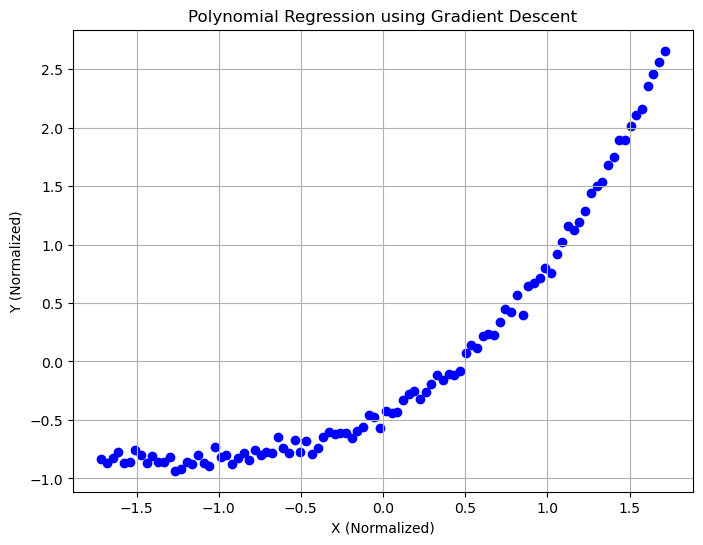

In [64]:
# Plotting the original data and the fitted polynomial
plt.figure(figsize=(8, 6))
plt.scatter(X_norm, Y_norm, label='Original Data', color='blue')
plt.xlabel('X (Normalized)')
plt.ylabel('Y (Normalized)')
plt.title('Polynomial Regression using Gradient Descent')
plt.grid(True)

## Polynomial Features

In [65]:
def polynomial_features(X, degree):
    X_poly = np.column_stack([X**i for i in range(degree+1)])
    return X_poly

In [66]:
degree = 3
test = np.array([2, 3, 4])
test_poly = polynomial_features(test, degree)

print(f"test_poly = {test_poly}")

test_poly = [[ 1  2  4  8]
 [ 1  3  9 27]
 [ 1  4 16 64]]


## Prediction Function

In [67]:
def predict(X, W):
    return np.dot(X, W)

## Gradient Descent

In [68]:
def gradeint_descent(X, Y, alpha, degree, iterations):
    X_poly = polynomial_features(X, degree)
    m, n = X_poly.shape
    
    # Initialize weights randomly
    W = np.random.randn(n)
    
    for i in range(iterations):
        f_wb = predict(X_poly, W)
        
        # Calculate errors and cost (mean squared error)
        errors = f_wb - Y
        cost = np.sum(errors ** 2) / (2 * m)
        
        d_dw = (1/m) * np.dot(X_poly.T, errors)  # For Polynomial Regression
        
        W = W - alpha * d_dw
        
        # Print the cost every few epochs
        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost}")
    
    return W

In [69]:
# Setting hyperparameters
degree = 3  # Polynomial degree
alpha = 0.01  # Learning Rate
epochs = 10000  # Iterations

optimal_W = gradeint_descent(X_norm, Y_norm, alpha, degree, epochs)

Iteration 0: Cost = 5.892125275146851
Iteration 100: Cost = 0.04332409577168631
Iteration 200: Cost = 0.022066231858723515
Iteration 300: Cost = 0.01598645157325431
Iteration 400: Cost = 0.01194041266909308
Iteration 500: Cost = 0.009126696292687886
Iteration 600: Cost = 0.0071178077478199035
Iteration 700: Cost = 0.005653427154996363
Iteration 800: Cost = 0.004568956579009354
Iteration 900: Cost = 0.0037564224571938515
Iteration 1000: Cost = 0.0031425089783301908
Iteration 1100: Cost = 0.0026759043326803106
Iteration 1200: Cost = 0.0023197883489496697
Iteration 1300: Cost = 0.002047216191320116
Iteration 1400: Cost = 0.0018381754672039496
Iteration 1500: Cost = 0.001677640422663661
Iteration 1600: Cost = 0.0015542412922916584
Iteration 1700: Cost = 0.0014593274181035677
Iteration 1800: Cost = 0.0013862917412352188
Iteration 1900: Cost = 0.001330074655736685
Iteration 2000: Cost = 0.0012867945133541545
Iteration 2100: Cost = 0.001253469655728335
Iteration 2200: Cost = 0.001227807788838

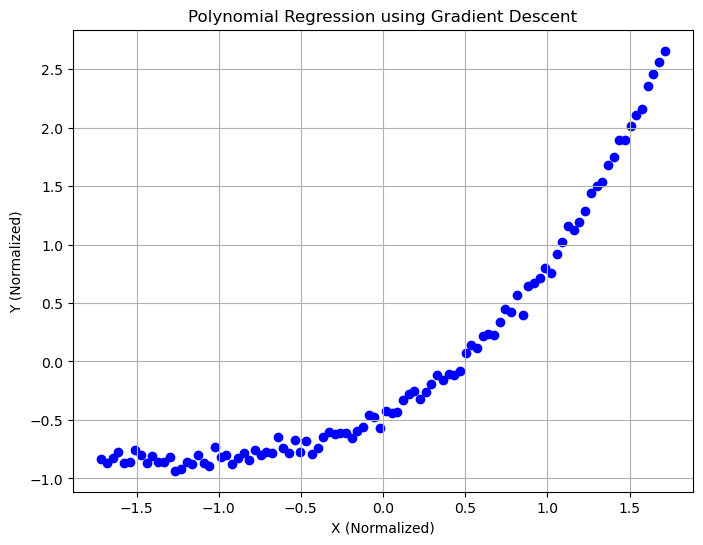

In [70]:
# Plotting the original data and the fitted polynomial
plt.figure(figsize=(8, 6))
plt.scatter(X_norm, Y_norm, label='Original Data', color='blue')
plt.xlabel('X (Normalized)')
plt.ylabel('Y (Normalized)')
plt.title('Polynomial Regression using Gradient Descent')
plt.grid(True)

In [71]:
# Generating curve using the learned weights
X_values = np.linspace(min(X_norm), max(X_norm), 100)
X_values_poly = polynomial_features(X_values, degree)
Y_values = predict(X_values_poly, optimal_W)

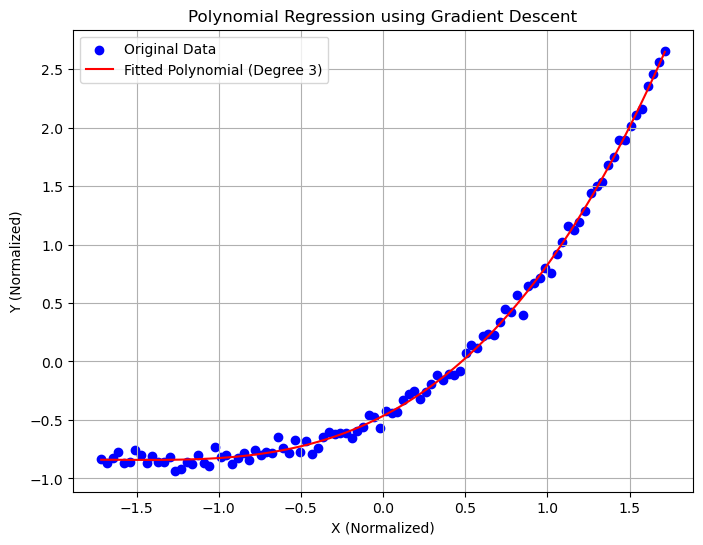

In [72]:
# Plotting the original data and the fitted polynomial
plt.figure(figsize=(8, 6))
plt.scatter(X_norm, Y_norm, label='Original Data', color='blue')
plt.xlabel('X (Normalized)')
plt.ylabel('Y (Normalized)')
plt.title('Polynomial Regression using Gradient Descent')
plt.grid(True)

# Plotting the fitted polynomial curve
plt.plot(X_values, Y_values, label=f'Fitted Polynomial (Degree {degree})', color='red')
plt.legend()
plt.show()